In [2]:
#importing necessary libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

In [3]:
# Loading the financial phrase dataset
df=pd.read_csv("C:\\Users\\NILEENA\\Desktop\\AI and ML\\Financial Phrase Dataset\\financial_phrase.csv")

In [4]:
# Displaying the first few rows 
df.head()

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [5]:
import sys
!{sys.executable} -m pip install contractions


In [6]:
# Importing Natural Language Toolkit and downloading necessary resource
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
# Importing libraries for text cleaning
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()

    # Expand contractions 
    try:
        text = contractions.fix(text)
    except Exception as e:
        print(f"Contraction error on: {text} | Error: {e}")
        pass

    # Remove URLs, mentions, hashtags, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stopwords and short tokens, then lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]

    return ' '.join(tokens)

# Clean text column if it exists
if 'text' in df.columns:
    df['cleaned_text'] = df['text'].fillna('').apply(clean_text)
    print("Text cleaning applied.")
    print(df[['text', 'cleaned_text']].head())
else:
    print("ERROR: 'text' column not found in the DataFrame.")

Text cleaning applied.
                                                text  \
0  According to Gran , the company has no plans t...   
1  For the last quarter of 2010 , Componenta 's n...   
2  In the third quarter of 2010 , net sales incre...   
3  Operating profit rose to EUR 13.1 mn from EUR ...   
4  Operating profit totalled EUR 21.1 mn , up fro...   

                                        cleaned_text  
0  according gran company plan move production ru...  
1  last quarter componenta net sale doubled eurm ...  
2  third quarter net sale increased eur mn operat...  
3  operating profit rose eur mn eur mn correspond...  
4  operating profit totalled eur mn eur mn repres...  


In [8]:
# Installing required packages for visualization
!pip install wordcloud
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Victus\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Victus\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



Generating Word Cloud for cleaned text...


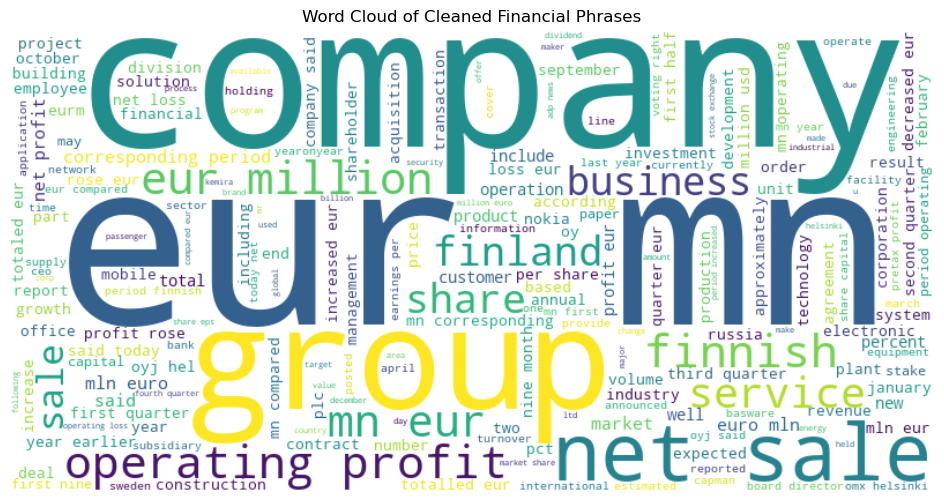

Word Cloud generated.


In [9]:
# Generate and Display Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("\nGenerating Word Cloud for cleaned text...")  # Informing user of the process

# Joining all cleaned text together, skipping any NaN values
all_words = ' '.join(df['cleaned_text'].dropna())  # dropna() to handle missing text

if all_words:  # Proceed only if there's text to display
    try:
        # Generate the word cloud with some custom settings
        wordcloud = WordCloud(width=800,
                              height=400,
                              background_color='white',
                              max_words=200  # Limit the word count for clarity
                             ).generate(all_words)

        # Display the word cloud in a larger figure
        plt.figure(figsize=(12, 6))  # Adjust figure size for better view
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axes for a cleaner look
        plt.title('Word Cloud of Cleaned Financial Phrases')  # Clear, descriptive title
        plt.show()
        print("Word Cloud generated.")  
    except Exception as e:
        print(f"Error generating word cloud: {e}")  
else:
    print("Skipping Word Cloud: No text data found in 'cleaned_text' column after cleaning.")  

In [10]:
# Installing scikit-learn using the current Python environment
import sys
!{sys.executable} -m pip install scikit-learn

In [11]:
# Importing pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

print("\n--- Encoding Text Labels in 'label' Column ---")

# Using LabelEncoder to convert text labels to numbers
label_encoder = LabelEncoder()

# Check if the 'label' column exists
if 'label' in df.columns:

    # Fit and transform the 'label' column to numbers
    df['label'] = label_encoder.fit_transform(df['label'])

    print("Text labels encoded successfully.")

    # Show the cleaned text and encoded labels
    print(df[['cleaned_text', 'label']].head())

    # Save label mappings for later use
    class_names = label_encoder.classes_
    print("\nLabel mapping:")
    print(dict(zip(class_names, label_encoder.transform(class_names))))
    print(f"Class names found: {class_names}")
    num_classes = len(class_names)
    print(f"Number of unique classes: {num_classes}")

else:
    print("ERROR: 'label' column not found.")


--- Encoding Text Labels in 'label' Column ---
Text labels encoded successfully.
                                        cleaned_text  label
0  according gran company plan move production ru...      1
1  last quarter componenta net sale doubled eurm ...      2
2  third quarter net sale increased eur mn operat...      2
3  operating profit rose eur mn eur mn correspond...      2
4  operating profit totalled eur mn eur mn repres...      2

Label mapping:
{'negative': 0, 'neutral': 1, 'positive': 2}
Class names found: ['negative' 'neutral' 'positive']
Number of unique classes: 3


In [12]:
from sklearn.model_selection import train_test_split

print("\n--- Splitting Data into Training and Validation Sets ---")

# Defining features (X) and target labels (y)
X = df['cleaned_text']
y = df['label']  # Using encoded 'label' column with numeric values

# Performs data split: 80% train, 20% validation
try:
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

    print("Data split successful.")
    print(f"Training features: {len(X_train)}")
    print(f"Validation features: {len(X_val)}")
    print(f"Training labels: {len(y_train)}")
    print(f"Validation labels: {len(y_val)}")

    #Checking class distribution in both training and validation sets
    print("\nTraining label distribution (Normalized):")
    print(pd.Series(y_train).value_counts(normalize=True))
    print("\nValidation label distribution (Normalized):")
    print(pd.Series(y_val).value_counts(normalize=True))

    y_train = np.array(y_train)
    y_val = np.array(y_val)
    print("\nConverted y_train and y_val to NumPy arrays.")
    print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

except Exception as e:
    print(f"ERROR during train_test_split: {e}")



--- Splitting Data into Training and Validation Sets ---
Data split successful.
Training features: 1811
Validation features: 453
Training labels: 1811
Validation labels: 453

Training label distribution (Normalized):
label
1    0.614578
2    0.251795
0    0.133628
Name: proportion, dtype: float64

Validation label distribution (Normalized):
label
1    0.613687
2    0.251656
0    0.134658
Name: proportion, dtype: float64

Converted y_train and y_val to NumPy arrays.
y_train shape: (1811,), y_val shape: (453,)


In [13]:
import sys
# Installing TensorFlow using the current Python environment
!{sys.executable} -m pip install tensorflow

In [14]:
# ---1: Tokenization ---

from tensorflow.keras.preprocessing.text import Tokenizer

print("\n--- Starting Tokenization ---")

# Defining Tokenizer parameters
VOCAB_SIZE = 15000  # Maximum number of words to keep
OOV_TOKEN = "<OOV>"  # Token for out-of-vocabulary words

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Fit the tokenizer ONLY on the training data (X_train)
if 'X_train' not in globals() or 'X_val' not in globals():
    print("ERROR: X_train or X_val not found. Please make sure you run train_test_split first.")
else:
    print("Fitting tokenizer on X_train...")
    tokenizer.fit_on_texts(X_train)

    # Geting the word index (dictionary mapping words to integers)
    word_index = tokenizer.word_index
    print(f"Found {len(word_index)} unique tokens in the training data.")
    print(f"Vocabulary size limited to {VOCAB_SIZE} most frequent words.")

    # Convert text data into sequences of integers
    print("Converting text to sequences...")
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_val_seq = tokenizer.texts_to_sequences(X_val)
    print("Text successfully converted to sequences.")

    print(f"Number of training sequences: {len(X_train_seq)}")
    print(f"Number of validation sequences: {len(X_val_seq)}")

    # Store the size of the word index for the embedding layer
    actual_vocab_size = min(VOCAB_SIZE, len(word_index) + 1)  # +1 for potential OOV token
    print(f"Effective vocabulary size for the Embedding layer: {actual_vocab_size}")



--- Starting Tokenization ---
Fitting tokenizer on X_train...
Found 4396 unique tokens in the training data.
Vocabulary size limited to 15000 most frequent words.
Converting text to sequences...
Text successfully converted to sequences.
Number of training sequences: 1811
Number of validation sequences: 453
Effective vocabulary size for the Embedding layer: 4397



--- Starting Padding ---


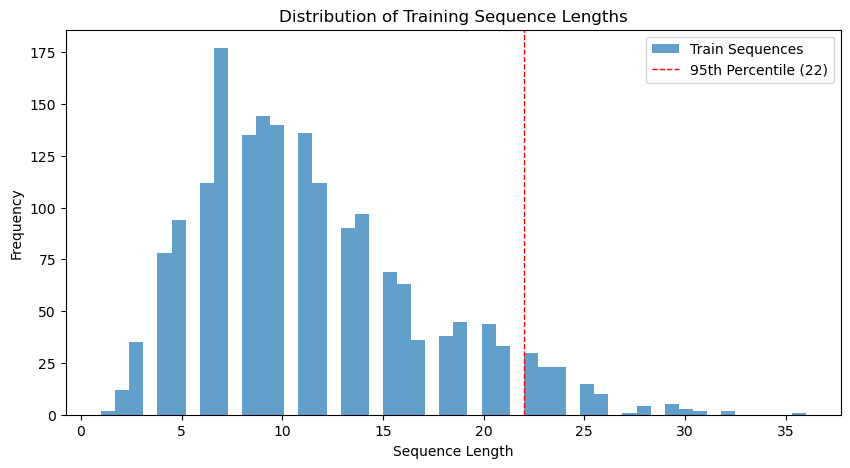

Selected maxlen: 22 based on 95th percentile.
Padding sequences...
Padding complete.
Shape of padded training data: (1811, 22)
Shape of training labels: (1811,)
Shape of padded validation data: (453, 22)
Shape of validation labels: (453,)


In [15]:
# --- Step 2: Padding ---

from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

print("\n--- Starting Padding ---")

# Checking if tokenized sequences exist
if 'X_train_seq' not in globals() or 'X_val_seq' not in globals():
    print("ERROR: X_train_seq or X_val_seq not found. Please run Tokenization first.")
else:
    # Getting sequence lengths of training data
    train_lengths = [len(seq) for seq in X_train_seq]

    # Setting maxlen based on sequence lengths
    if not train_lengths:
        print("Warning: No sequences found. Using default maxlen of 50.")
        maxlen = 50  # Default value
    else:
        # Plotting sequence lengths distribution
        plt.figure(figsize=(10, 5))
        plt.hist(train_lengths, bins=50, alpha=0.7, label='Train Sequences')
        plt.xlabel('Sequence Length')
        plt.ylabel('Frequency')
        plt.title('Distribution of Training Sequence Lengths')

        # Marking the 95th percentile value
        MAX_SEQUENCE_LENGTH_PERCENTILE = 95
        percentile_value = np.percentile(train_lengths, MAX_SEQUENCE_LENGTH_PERCENTILE)
        plt.axvline(percentile_value, color='red', linestyle='dashed', linewidth=1, label=f'{MAX_SEQUENCE_LENGTH_PERCENTILE}th Percentile ({int(percentile_value)})')
        plt.legend()
        plt.show()

        # Setting maxlen using the 95th percentile
        maxlen = int(percentile_value)
        maxlen = max(1, maxlen)  # Ensuring maxlen is at least 1
        print(f"Selected maxlen: {maxlen} based on {MAX_SEQUENCE_LENGTH_PERCENTILE}th percentile.")

    # Padding sequences (adjusting length by adding 0s or truncating)
    print("Padding sequences...")
    X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
    X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post', truncating='post')

    print("Padding complete.")

    # Verifying shapes of padded data
    if 'y_train' in globals() and 'y_val' in globals():
        print(f"Shape of padded training data: {X_train_pad.shape}")
        print(f"Shape of training labels: {y_train.shape}")
        print(f"Shape of padded validation data: {X_val_pad.shape}")
        print(f"Shape of validation labels: {y_val.shape}")
    else:
        print("Warning: y_train or y_val not found. Cannot print label shapes.")
        print(f"Shape of padded training data: {X_train_pad.shape}")
        print(f"Shape of padded validation data: {X_val_pad.shape}")

In [16]:
print("\n--- Checking Number of Classes and Setting Model Parameters ---")

# Checking the number of classes in the 'label' column
if 'df' in globals() and 'label' in df.columns:
    num_classes = df['label'].nunique()
    print(f"Number of unique sentiment classes found: {num_classes}")

    # Setting model parameters based on the number of classes
    if num_classes == 2:
        print("Detected Binary Classification problem.")
        output_activation = 'sigmoid'
        output_units = 1
        loss_function = 'binary_crossentropy'
        compile_metrics = ['accuracy']
        y_train = np.array(y_train)  # Ensuring y_train is a numpy array
        y_val = np.array(y_val)  # Ensuring y_val is a numpy array
    elif num_classes > 2:
        print(f"Detected Multi-class Classification problem with {num_classes} classes.")
        output_activation = 'softmax'  # Using softmax for multi-class probabilities
        output_units = num_classes  # Setting output units equal to the number of classes
        loss_function = 'sparse_categorical_crossentropy'  # Using sparse categorical crossentropy for integer labels
        compile_metrics = ['accuracy']
        y_train = np.array(y_train)  # Ensuring y_train is a numpy array
        y_val = np.array(y_val)  # Ensuring y_val is a numpy array
    else:
        raise ValueError(f"Could not determine the number of classes (Found {num_classes}). Please check your 'label' column.")

    # Printing model configuration
    print(f"Configuration set:")
    print(f"  Output Units: {output_units}")
    print(f"  Output Activation: {output_activation}")
    print(f"  Loss Function: {loss_function}")
    print(f"  Compile Metrics: {compile_metrics}")
else:
    print("ERROR: DataFrame 'df' or 'label' column not found. Cannot determine number of classes.")

print("\n--- Task 3.1 (Preprocessing, Tokenization, Padding, Class Check) Complete ---")



--- Checking Number of Classes and Setting Model Parameters ---
Number of unique sentiment classes found: 3
Detected Multi-class Classification problem with 3 classes.
Configuration set:
  Output Units: 3
  Output Activation: softmax
  Loss Function: sparse_categorical_crossentropy
  Compile Metrics: ['accuracy']

--- Task 3.1 (Preprocessing, Tokenization, Padding, Class Check) Complete ---


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, SpatialDropout1D
# Ensure numpy is imported if not already, for model.build if needed implicitly by TF later
import numpy as np

print("\n--- Building Model 1 (Simple RNN) & Model 2 (LSTM Trainable) ---")

# Defining model parameters
EMBEDDING_DIM_TRAINABLE = 128  # Trainable embedding dimension
RNN_UNITS = 64  # RNN units
LSTM_UNITS = 64  # LSTM units

# Check if necessary variables are defined
required_vars = ['actual_vocab_size', 'maxlen', 'output_units', 'output_activation']
if not all(v in globals() for v in required_vars):
    print("ERROR: Missing required variables. Ensure Tokenization, Padding, and Class Check were successful.")
else:
    print("Required variables found. Proceeding with model building...")

    # Building Model 1: Simple RNN
    print("\nBuilding Model 1: Simple RNN (Trainable Embedding)...")
    rnn_model = Sequential(name="Simple_RNN_Model")
    rnn_model.add(Embedding(input_dim=actual_vocab_size,
                            output_dim=EMBEDDING_DIM_TRAINABLE,
                            input_length=maxlen, # input_length is for the Embedding layer
                            name="Trainable_Embedding"))
    rnn_model.add(SpatialDropout1D(0.2, name="Spatial_Dropout_RNN"))  # Dropout for embeddings
    rnn_model.add(SimpleRNN(RNN_UNITS, name="SimpleRNN"))
    rnn_model.add(Dropout(0.3, name="Dropout_RNN"))  # Regular dropout
    rnn_model.add(Dense(output_units, activation=output_activation, name="Output_RNN"))

    # Explicitly build the model to get the full summary
    # The input shape to build is (batch_size, sequence_length)
    # We use maxlen for sequence_length, which is correct after padding.
    rnn_model.build(input_shape=(None, maxlen))
    print("Simple RNN Model Summary:")
    rnn_model.summary()

    # Building Model 2: LSTM
    print("\nBuilding Model 2: LSTM (Trainable Embedding)...")
    lstm_model_trainable = Sequential(name="LSTM_Trainable_Embedding_Model")
    lstm_model_trainable.add(Embedding(input_dim=actual_vocab_size,
                                       output_dim=EMBEDDING_DIM_TRAINABLE,
                                       input_length=maxlen, # input_length is for the Embedding layer
                                       name="Trainable_Embedding"))
    lstm_model_trainable.add(SpatialDropout1D(0.2, name="Spatial_Dropout_LSTM_Trainable"))
    lstm_model_trainable.add(LSTM(LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2, name="LSTM_Trainable"))
    lstm_model_trainable.add(Dropout(0.3, name="Dropout_LSTM_Trainable"))
    lstm_model_trainable.add(Dense(output_units, activation=output_activation, name="Output_LSTM_Trainable"))

    # Explicitly build the model
    lstm_model_trainable.build(input_shape=(None, maxlen))
    print("LSTM Model (Trainable Embedding) Summary:")
    lstm_model_trainable.summary()

    print("\n--- Models 1 & 2 Defined ---")


--- Building Model 1 (Simple RNN) & Model 2 (LSTM Trainable) ---
Required variables found. Proceeding with model building...

Building Model 1: Simple RNN (Trainable Embedding)...
Simple RNN Model Summary:


C:\Users\Victus\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Simple_RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Trainable_Embedding (Embedding)      │ (None, 22, 128)             │         562,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Spatial_Dropout_RNN                  │ (None, 22, 128)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ SimpleRNN (SimpleRNN)                │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_RNN (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_RNN (Dense)                   │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 575,363 (2.19 MB)

 Trainable params: 575,363 (2.19 MB)

 Non-trainable params: 0 (0.00 B)


Building Model 2: LSTM (Trainable Embedding)...
LSTM Model (Trainable Embedding) Summary:


Model: "LSTM_Trainable_Embedding_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Trainable_Embedding (Embedding)      │ (None, 22, 128)             │         562,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Spatial_Dropout_LSTM_Trainable       │ (None, 22, 128)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_Trainable (LSTM)                │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_LSTM_Trainable (Dropout)     │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_LSTM_Trainable (Dense)        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,419 (2.34 MB)

 Trainable params: 612,419 (2.34 MB)

 Non-trainable params: 0 (0.00 B)


--- Models 1 & 2 Defined ---


In [18]:
import sys

# Printed the path of the Python executable
print(sys.executable)

C:\Users\Victus\anaconda3\envs\myenv\python.exe


In [19]:
# Install gensim package
import sys
!{sys.executable} -m pip install gensim

In [20]:
# --- Task 3.2: Building Word2Vec + LSTM Model ---

import gensim
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import os
# Ensure numpy is imported for embedding_matrix and model.build
import numpy as np
import gc


print("\n--- Loading Word2Vec & Building LSTM Word2Vec Model ---")

# Load Word2Vec model and create an embedding matrix
WORD2VEC_PATH = r"C:\Jupyter notebook\GoogleNews-vectors-negative300.bin"  # Update with your actual path
embedding_matrix = None

# Check if the Word2Vec file exists before loading
if not os.path.exists(WORD2VEC_PATH):
    print(f"ERROR: Word2Vec file not found at {WORD2VEC_PATH}. Check the path.")
elif 'word_index' not in globals() or 'actual_vocab_size' not in globals():
    print("ERROR: 'word_index' or 'actual_vocab_size' are missing. Run Tokenization step.")
else:
    try:
        # Load the Word2Vec model
        print(f"Loading Word2Vec model from: {WORD2VEC_PATH}...")
        word2vec_model = KeyedVectors.load_word2vec_format(WORD2VEC_PATH, binary=True)
        print("Word2Vec model loaded.")

        EMBEDDING_DIM_W2V = word2vec_model.vector_size
        print(f"Word2Vec embedding dimension: {EMBEDDING_DIM_W2V}")

        # Create embedding matrix
        print("\nCreating embedding matrix for LSTM Word2Vec model...")
        embedding_matrix = np.zeros((actual_vocab_size, EMBEDDING_DIM_W2V))
        words_found = 0
        words_not_found = 0

        # Fill the embedding matrix with Word2Vec vectors
        for word, i in word_index.items():
            if i < actual_vocab_size: # Ensure index is within bounds
                try:
                    embedding_vector = word2vec_model[word]
                    embedding_matrix[i] = embedding_vector
                    words_found += 1
                except KeyError:
                    words_not_found += 1
                    pass # Word not in Word2Vec, remains zeros

        print(f"Embedding matrix shape: {embedding_matrix.shape}")
        print(f"Words found: {words_found}, Words not found: {words_not_found}")

        # Clean up memory after using Word2Vec
        print("Freeing up memory by deleting Word2Vec model...")
        del word2vec_model
        gc.collect()
        print("Word2Vec model deleted.")

    except Exception as e:
        print(f"Error while loading Word2Vec or creating matrix: {e}")
        embedding_matrix = None  # Set to None if an error occurs

# Build the LSTM model using Word2Vec embedding
required_vars_part2 = ['embedding_matrix', 'actual_vocab_size', 'maxlen', 'LSTM_UNITS', 'output_units', 'output_activation', 'EMBEDDING_DIM_W2V']

if embedding_matrix is not None and all(v in globals() for v in required_vars_part2):
    print("\nBuilding LSTM model with Word2Vec embeddings...")
    lstm_model_w2v = Sequential(name="LSTM_Word2Vec_Embedding_Model")
    lstm_model_w2v.add(Embedding(input_dim=actual_vocab_size,    # Vocabulary size
                                 output_dim=EMBEDDING_DIM_W2V, # Word2Vec embedding dimension
                                 weights=[embedding_matrix],   # Pre-trained weights
                                 input_length=maxlen,          # Maximum sequence length
                                 trainable=False,              # Freeze embedding layer
                                 name="Word2Vec_Embedding"))
    lstm_model_w2v.add(SpatialDropout1D(0.2, name="Spatial_Dropout_LSTM_W2V"))
    lstm_model_w2v.add(LSTM(LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2, name="LSTM_W2V"))
    lstm_model_w2v.add(Dropout(0.3, name="Dropout_LSTM_W2V"))
    lstm_model_w2v.add(Dense(output_units, activation=output_activation, name="Output_LSTM_W2V"))

    # Explicitly build the model
    lstm_model_w2v.build(input_shape=(None, maxlen))
    print("\nLSTM Model with Word2Vec embeddings built. Model summary:")
    lstm_model_w2v.summary()

else:
    print("\nSkipping LSTM model build: Embedding matrix or other required variables are missing.")

print("\n--- Task 3.2 Complete ---")


--- Loading Word2Vec & Building LSTM Word2Vec Model ---
Loading Word2Vec model from: C:\Jupyter notebook\GoogleNews-vectors-negative300.bin...
Word2Vec model loaded.
Word2Vec embedding dimension: 300

Creating embedding matrix for LSTM Word2Vec model...
Embedding matrix shape: (4397, 300)
Words found: 3389, Words not found: 1007
Freeing up memory by deleting Word2Vec model...
Word2Vec model deleted.

Building LSTM model with Word2Vec embeddings...

LSTM Model with Word2Vec embeddings built. Model summary:


Model: "LSTM_Word2Vec_Embedding_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Word2Vec_Embedding (Embedding)       │ (None, 22, 300)             │       1,319,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Spatial_Dropout_LSTM_W2V             │ (None, 22, 300)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_W2V (LSTM)                      │ (None, 64)                  │          93,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_LSTM_W2V (Dropout)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_LSTM_W2V (Dense)              │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,412,735 (5.39 MB)

 Trainable params: 93,635 (365.76 KB)

 Non-trainable params: 1,319,100 (5.03 MB)


--- Task 3.2 Complete ---


In [21]:
# --- Task 3.3: Model Compilation & Callback Setup ---

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os  # Ensuring os is imported

print("\n--- Task 3.3: Compiling Models & Setting Up Callbacks ---")

# --- Training Parameters ---
EPOCHS = 15         # Setting max epochs
BATCH_SIZE = 64     # Defining batch size
PATIENCE = 3        # Setting patience for EarlyStopping

# --- Model Saving ---
MODEL_SAVE_DIR = r"C:\Jupyter notebook\saved_models"  # Defining model save directory
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)  # Creating directory if not exists

# Defining model save paths
BEST_RNN_MODEL_PATH = os.path.join(MODEL_SAVE_DIR, 'best_rnn_model.keras')
BEST_LSTM_TRAINABLE_MODEL_PATH = os.path.join(MODEL_SAVE_DIR, 'best_lstm_trainable_model.keras')
BEST_LSTM_W2V_MODEL_PATH = os.path.join(MODEL_SAVE_DIR, 'best_lstm_w2v_model.keras')

# --- Compiling Models ---
compile_vars_exist = 'loss_function' in globals() and 'compile_metrics' in globals()
model1_exists = 'rnn_model' in globals()
model2_exists = 'lstm_model_trainable' in globals()
model3_exists = 'lstm_model_w2v' in globals() and lstm_model_w2v is not None

if not compile_vars_exist:
    print("ERROR: loss_function or compile_metrics not defined.")
else:
    print(f"Using Loss: {loss_function}, Metrics: {compile_metrics}")

    if model1_exists:
        rnn_model.compile(loss=loss_function, optimizer='adam', metrics=compile_metrics)
        print("RNN Model compiled.")

    if model2_exists:
        lstm_model_trainable.compile(loss=loss_function, optimizer='adam', metrics=compile_metrics)
        print("LSTM (Trainable) Model compiled.")

    if model3_exists:
        lstm_model_w2v.compile(loss=loss_function, optimizer='adam', metrics=compile_metrics)
        print("LSTM (Word2Vec) Model compiled.")

# --- Setting Up Callbacks ---
print("\nSetting up Callbacks (EarlyStopping, ModelCheckpoint)...")

# EarlyStopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1)

# ModelCheckpoint setup for each model
callbacks_rnn = [early_stopping]
if model1_exists:
    rnn_checkpoint = ModelCheckpoint(BEST_RNN_MODEL_PATH, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    callbacks_rnn.append(rnn_checkpoint)
    print(f"RNN Checkpoint configured: {BEST_RNN_MODEL_PATH}")

callbacks_lstm_trainable = [early_stopping]
if model2_exists:
    lstm_trainable_checkpoint = ModelCheckpoint(BEST_LSTM_TRAINABLE_MODEL_PATH, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    callbacks_lstm_trainable.append(lstm_trainable_checkpoint)
    print(f"LSTM (Trainable) Checkpoint configured: {BEST_LSTM_TRAINABLE_MODEL_PATH}")

callbacks_lstm_w2v = [early_stopping]
if model3_exists:
    lstm_w2v_checkpoint = ModelCheckpoint(BEST_LSTM_W2V_MODEL_PATH, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    callbacks_lstm_w2v.append(lstm_w2v_checkpoint)
    print(f"LSTM (Word2Vec) Checkpoint configured: {BEST_LSTM_W2V_MODEL_PATH}")

print("\n--- Model Compilation and Callback Setup Complete ---")
print("Ready to start training.")



--- Task 3.3: Compiling Models & Setting Up Callbacks ---
Using Loss: sparse_categorical_crossentropy, Metrics: ['accuracy']
RNN Model compiled.
LSTM (Trainable) Model compiled.
LSTM (Word2Vec) Model compiled.

Setting up Callbacks (EarlyStopping, ModelCheckpoint)...
RNN Checkpoint configured: C:\Jupyter notebook\saved_models\best_rnn_model.keras
LSTM (Trainable) Checkpoint configured: C:\Jupyter notebook\saved_models\best_lstm_trainable_model.keras
LSTM (Word2Vec) Checkpoint configured: C:\Jupyter notebook\saved_models\best_lstm_w2v_model.keras

--- Model Compilation and Callback Setup Complete ---
Ready to start training.


In [22]:
import sys
# Installing seaborn using the current Python executable
!{sys.executable} -m pip install seaborn


--- Task 3.3: Starting Model Training & Evaluation ---

--- Training Model 1: Simple RNN ---
Training Simple_RNN_Model for up to 15 epochs (Batch Size: 64)...
Epoch 1/15
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5517 - loss: 0.9797
Epoch 1: val_accuracy improved from -inf to 0.68874, saving model to C:\Jupyter notebook\saved_models\best_rnn_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5647 - loss: 0.9655 - val_accuracy: 0.6887 - val_loss: 0.7178
Epoch 2/15
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7857 - loss: 0.5508 
Epoch 2: val_accuracy improved from 0.68874 to 0.77925, saving model to C:\Jupyter notebook\saved_models\best_rnn_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7870 - loss: 0.5466 - val_accuracy: 0.7792 - val_loss: 0.5690
Epoch 3/15
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8824 - loss: 0.3333  
Epoch 3: val_accuracy did not improve from 0.77925
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 

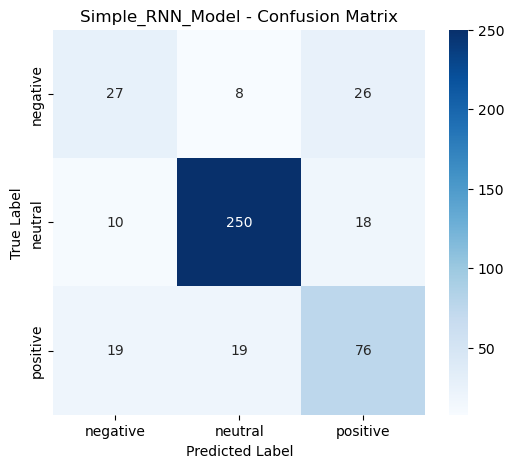


--- Evaluating LSTM_Trainable_Embedding_Model ---
Loading best weights for LSTM_Trainable_Embedding_Model from: C:\Jupyter notebook\saved_models\best_lstm_trainable_model.keras
Best model loaded successfully.
LSTM_Trainable_Embedding_Model - Validation Loss: 0.5287
LSTM_Trainable_Embedding_Model - Validation Accuracy: 0.7682
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step 

LSTM_Trainable_Embedding_Model - Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        61
     neutral       0.91      0.92      0.92       278
    positive       0.53      0.81      0.64       114

    accuracy                           0.77       453
   macro avg       0.48      0.58      0.52       453
weighted avg       0.69      0.77      0.72       453

LSTM_Trainable_Embedding_Model - Confusion Matrix:


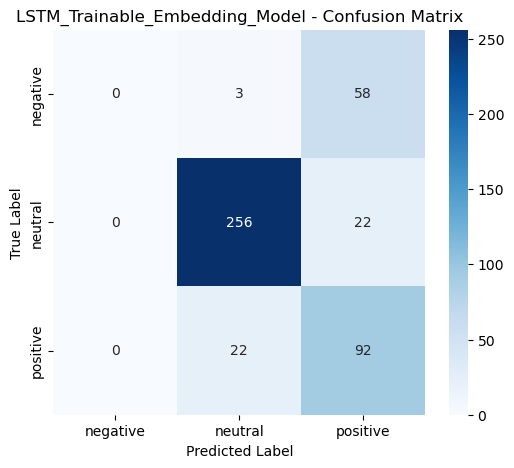


--- Evaluating LSTM_Word2Vec_Embedding_Model ---
Loading best weights for LSTM_Word2Vec_Embedding_Model from: C:\Jupyter notebook\saved_models\best_lstm_w2v_model.keras
Best model loaded successfully.
LSTM_Word2Vec_Embedding_Model - Validation Loss: 0.3890
LSTM_Word2Vec_Embedding_Model - Validation Accuracy: 0.8653
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step 

LSTM_Word2Vec_Embedding_Model - Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.56      0.64        61
     neutral       0.93      0.97      0.95       278
    positive       0.76      0.76      0.76       114

    accuracy                           0.87       453
   macro avg       0.81      0.77      0.78       453
weighted avg       0.86      0.87      0.86       453

LSTM_Word2Vec_Embedding_Model - Confusion Matrix:


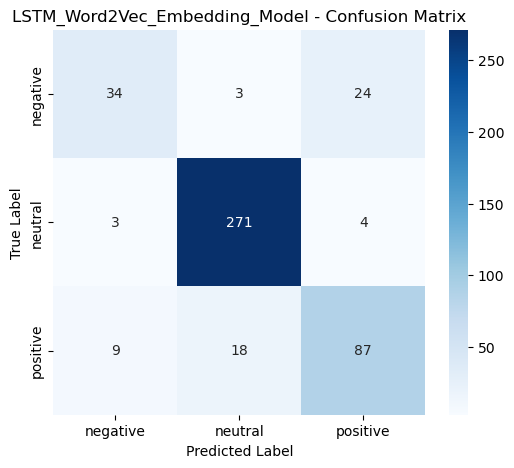



--- Plotting Training Histories ---


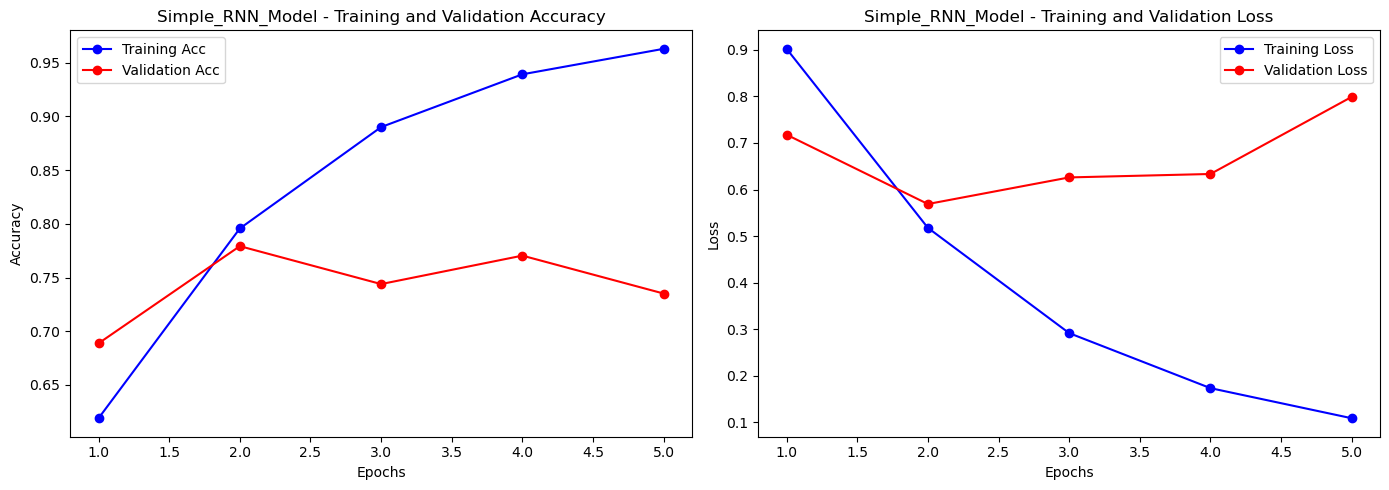

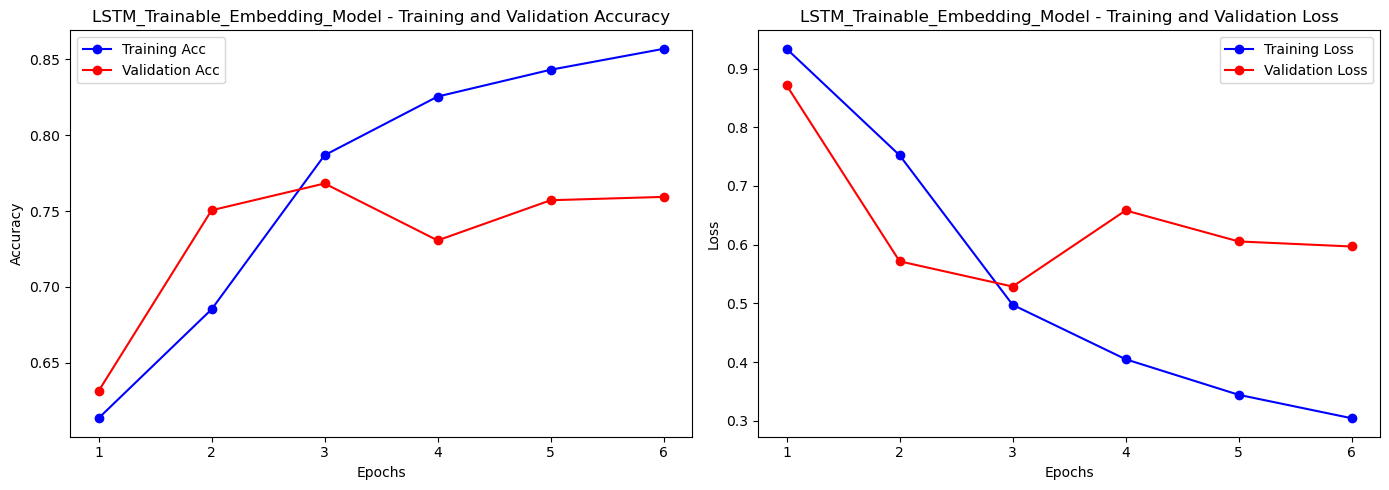

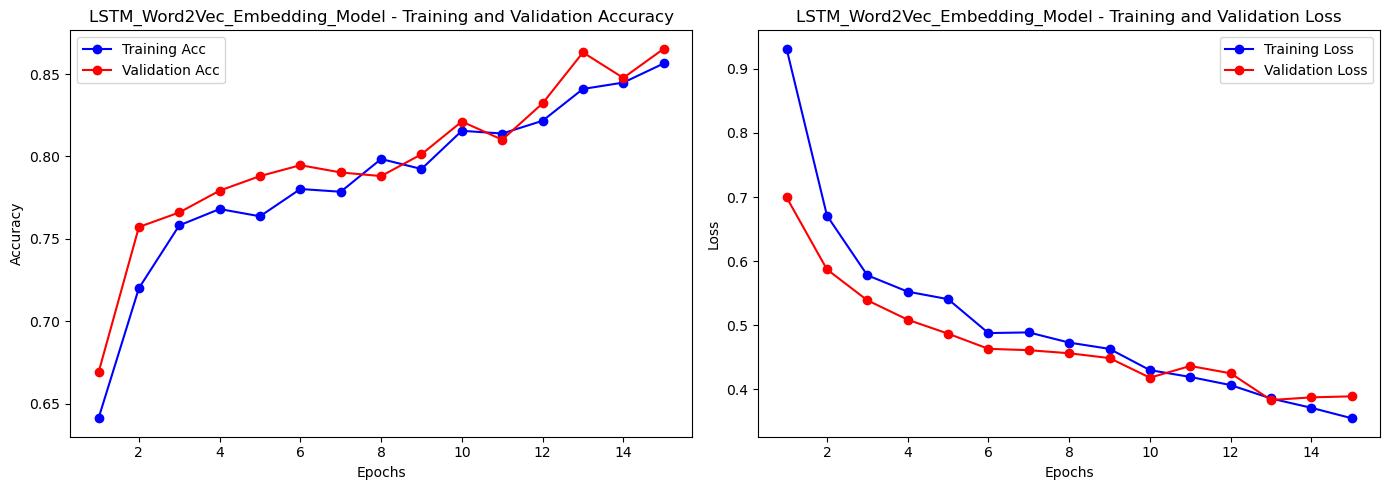



--- Model Performance Comparison ---
                         Model  Validation Accuracy  Validation Loss  Training Time (s)
 LSTM_Word2Vec_Embedding_Model             0.865342         0.388997          19.149583
              Simple_RNN_Model             0.779249         0.568955           5.912168
LSTM_Trainable_Embedding_Model             0.768212         0.528672           9.689325


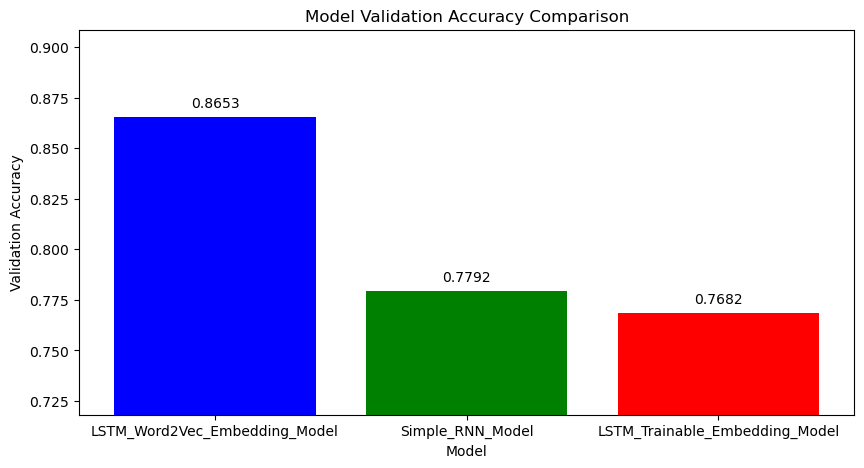


--- Task 3.3 (Training & Evaluation) Complete ---


In [23]:
# ==============================================================================
# Task 3.3: Model Training and Evaluation ==
# ==============================================================================
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model # To load the best saved models
import pandas as pd # For summary table

print("\n--- Task 3.3: Starting Model Training & Evaluation ---")

# Storing results for comparison
results = {
    'Model': [],
    'Validation Accuracy': [],
    'Validation Loss': [],
    'Training Time (s)': []
}
histories = {} 

# --- Train Model 1: Simple RNN ---
print("\n--- Training Model 1: Simple RNN ---")
model_name_rnn = "Simple_RNN_Model"
history_rnn = None # Initialize history
rnn_train_time = 0

if 'rnn_model' in globals() and rnn_model is not None and 'callbacks_rnn' in globals() and 'X_train_pad' in globals() and 'y_train' in globals() and 'X_val_pad' in globals() and 'y_val' in globals():
    print(f"Training {model_name_rnn} for up to {EPOCHS} epochs (Batch Size: {BATCH_SIZE})...")
    start_time = time.time()
    try:
        X_train_pad_fit = X_train_pad.astype(np.float32)
        y_train_fit = y_train.astype(np.int64)
        X_val_pad_fit = X_val_pad.astype(np.float32)
        y_val_fit = y_val.astype(np.int64)

        rnn_history_object = rnn_model.fit(X_train_pad_fit, y_train_fit,
                                           epochs=EPOCHS,
                                           batch_size=BATCH_SIZE,
                                           validation_data=(X_val_pad_fit, y_val_fit),
                                           callbacks=callbacks_rnn,
                                           verbose=1)
        rnn_train_time = time.time() - start_time
        print(f"\n{model_name_rnn} Training finished in {rnn_train_time:.2f} seconds.")
        history_rnn = rnn_history_object.history 
        histories[model_name_rnn] = history_rnn 
    except Exception as e:
        print(f"ERROR during {model_name_rnn} training: {e}")
else:
    print(f"Skipping {model_name_rnn} training: Model, callbacks or data not defined.")

# --- Train Model 2: LSTM (Trainable Embedding) ---
print("\n--- Training Model 2: LSTM (Trainable Embedding) ---")
model_name_lstm_trainable = "LSTM_Trainable_Embedding_Model"
history_lstm_trainable = None
lstm_trainable_train_time = 0

if 'lstm_model_trainable' in globals() and lstm_model_trainable is not None and 'callbacks_lstm_trainable' in globals() and 'X_train_pad' in globals() and 'y_train' in globals() and 'X_val_pad' in globals() and 'y_val' in globals():
    print(f"Training {model_name_lstm_trainable} for up to {EPOCHS} epochs (Batch Size: {BATCH_SIZE})...")
    start_time = time.time()
    try:
        X_train_pad_fit = X_train_pad.astype(np.float32)
        y_train_fit = y_train.astype(np.int64)
        X_val_pad_fit = X_val_pad.astype(np.float32)
        y_val_fit = y_val.astype(np.int64)

        lstm_trainable_history_object = lstm_model_trainable.fit(X_train_pad_fit, y_train_fit,
                                                                 epochs=EPOCHS,
                                                                 batch_size=BATCH_SIZE,
                                                                 validation_data=(X_val_pad_fit, y_val_fit),
                                                                 callbacks=callbacks_lstm_trainable,
                                                                 verbose=1)
        lstm_trainable_train_time = time.time() - start_time
        print(f"\n{model_name_lstm_trainable} Training finished in {lstm_trainable_train_time:.2f} seconds.")
        history_lstm_trainable = lstm_trainable_history_object.history
        histories[model_name_lstm_trainable] = history_lstm_trainable
    except Exception as e:
        print(f"ERROR during {model_name_lstm_trainable} training: {e}")
else:
    print(f"Skipping {model_name_lstm_trainable} training: Model, callbacks or data not defined.")

# --- Train Model 3: LSTM (Word2Vec Embedding) ---
print("\n--- Training Model 3: LSTM (Word2Vec Embedding) ---")
model_name_lstm_w2v = "LSTM_Word2Vec_Embedding_Model"
history_lstm_w2v = None
lstm_w2v_train_time = 0

if 'lstm_model_w2v' in globals() and lstm_model_w2v is not None and 'callbacks_lstm_w2v' in globals() and 'X_train_pad' in globals() and 'y_train' in globals() and 'X_val_pad' in globals() and 'y_val' in globals():
    print(f"Training {model_name_lstm_w2v} for up to {EPOCHS} epochs (Batch Size: {BATCH_SIZE})...")
    start_time = time.time()
    try:
        X_train_pad_fit = X_train_pad.astype(np.float32)
        y_train_fit = y_train.astype(np.int64)
        X_val_pad_fit = X_val_pad.astype(np.float32)
        y_val_fit = y_val.astype(np.int64)

        lstm_w2v_history_object = lstm_model_w2v.fit(X_train_pad_fit, y_train_fit,
                                                     epochs=EPOCHS,
                                                     batch_size=BATCH_SIZE,
                                                     validation_data=(X_val_pad_fit, y_val_fit),
                                                     callbacks=callbacks_lstm_w2v,
                                                     verbose=1)
        lstm_w2v_train_time = time.time() - start_time
        print(f"\n{model_name_lstm_w2v} Training finished in {lstm_w2v_train_time:.2f} seconds.")
        history_lstm_w2v = lstm_w2v_history_object.history
        histories[model_name_lstm_w2v] = history_lstm_w2v
    except Exception as e:
        print(f"ERROR during {model_name_lstm_w2v} training: {e}")
else:
    print(f"Skipping {model_name_lstm_w2v} training: Model not defined/built or callbacks not defined.")

print("\n--- All Model Training Attempts Complete ---")


# --- Evaluation ---
print("\n\n--- Evaluating Models ---")

# MINIMALLY MODIFIED Function to evaluate a single model
def evaluate_model(model, model_name, best_model_path, X_val_data, y_val_data, history, train_time):
    print(f"\n--- Evaluating {model_name} ---")

    # Critical: Ensure these global variables exist from the Label Encoding cell
    if 'num_classes' not in globals() or 'class_names' not in globals():
        print(f"CRITICAL ERROR: 'num_classes' or 'class_names' not found in global scope. Cannot evaluate {model_name}.")
        print("Please ensure the Label Encoding cell (cell 44) was run successfully.")
        return # Exit the function if these are missing

    # Now we can safely use them, Python will find them in the global scope
    # as there are no local assignments to these names in this function anymore.

    if model is None or history is None:
        print(f"Skipping evaluation for {model_name}: Model or training history not available.")
        return

    print(f"Loading best weights for {model_name} from: {best_model_path}")
    try:
        best_model = load_model(best_model_path)
        print("Best model loaded successfully.")
    except Exception as e:
        print(f"Warning: Could not load saved model from {best_model_path}. Error: {e}")
        print("Evaluating using the model state in memory (restored by EarlyStopping if triggered).")
        best_model = model 

    try:
        loss, accuracy = best_model.evaluate(X_val_data, y_val_data, verbose=0)
        print(f"{model_name} - Validation Loss: {loss:.4f}")
        print(f"{model_name} - Validation Accuracy: {accuracy:.4f}")

        results['Model'].append(model_name)
        results['Validation Accuracy'].append(accuracy)
        results['Validation Loss'].append(loss)
        results['Training Time (s)'].append(train_time)

        y_pred_prob = best_model.predict(X_val_data)

        # Use global num_classes for this logic
        if num_classes == 2: 
            y_pred = (y_pred_prob > 0.5).astype(int).flatten()
        else:
            y_pred = np.argmax(y_pred_prob, axis=1)

        print(f"\n{model_name} - Classification Report:")
        # Use global class_names which should be ['negative', 'neutral', 'positive']
        print(classification_report(y_val_data, y_pred, target_names=class_names, zero_division=0))

        print(f"{model_name} - Confusion Matrix:")
        cm = confusion_matrix(y_val_data, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'{model_name} - Confusion Matrix')
        plt.show()

    except Exception as e:
        print(f"ERROR during evaluation of {model_name}: {e}")

# Evaluating each model that was trained
X_val_pad_eval = X_val_pad.astype(np.float32) if 'X_val_pad' in globals() else None
y_val_eval = y_val.astype(np.int64) if 'y_val' in globals() else None

if X_val_pad_eval is None or y_val_eval is None:
    print("ERROR: Validation data (X_val_pad or y_val) not defined. Skipping evaluation.")
else:
    if 'rnn_model' in globals() and rnn_model is not None:
        evaluate_model(rnn_model, model_name_rnn, BEST_RNN_MODEL_PATH, X_val_pad_eval, y_val_eval, history_rnn, rnn_train_time)

    if 'lstm_model_trainable' in globals() and lstm_model_trainable is not None:
        evaluate_model(lstm_model_trainable, model_name_lstm_trainable, BEST_LSTM_TRAINABLE_MODEL_PATH, X_val_pad_eval, y_val_eval, history_lstm_trainable, lstm_trainable_train_time)

    if 'lstm_model_w2v' in globals() and lstm_model_w2v is not None:
        evaluate_model(lstm_model_w2v, model_name_lstm_w2v, BEST_LSTM_W2V_MODEL_PATH, X_val_pad_eval, y_val_eval, history_lstm_w2v, lstm_w2v_train_time)


# --- Plot Training History ---
print("\n\n--- Plotting Training Histories ---")

def plot_history(history_dict, model_name):
    if not history_dict:
        print(f"No history data to plot for {model_name}.")
        return

    acc = history_dict.get('accuracy', [])
    val_acc = history_dict.get('val_accuracy', [])
    loss = history_dict.get('loss', [])
    val_loss = history_dict.get('val_loss', [])
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    if acc: plt.plot(epochs_range, acc, 'bo-', label='Training Acc')
    if val_acc: plt.plot(epochs_range, val_acc, 'ro-', label='Validation Acc')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if acc or val_acc: plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    if loss: plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
    if val_loss: plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if loss or val_loss: plt.legend()

    plt.tight_layout()
    plt.show()

for model_name, history_data in histories.items():
     plot_history(history_data, model_name)

# --- Comparison Summary ---
print("\n\n--- Model Performance Comparison ---")

if results['Model']: 
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)
    print(results_df.to_string(index=False))

    plt.figure(figsize=(10, 5))
    plt.bar(results_df['Model'], results_df['Validation Accuracy'], color=['blue', 'green', 'red'][:len(results_df)])
    plt.xlabel("Model")
    plt.ylabel("Validation Accuracy")
    plt.title("Model Validation Accuracy Comparison")
    plt.ylim(bottom=max(0, results_df['Validation Accuracy'].min() - 0.05)) 
    for index, value in enumerate(results_df['Validation Accuracy']):
        plt.text(index, value + 0.005, f"{value:.4f}", ha='center')
    plt.show()
else:
    print("No models were successfully trained and evaluated to compare.")

print("\n--- Task 3.3 (Training & Evaluation) Complete ---")

In [25]:
# Installing Gradio using sys.executable
import sys
!{sys.executable} -m pip install gradio

In [26]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os

print("\n--- Task 3.4: Setting up GUI for Real-Time Prediction ---")

# --- Configuration (Loading necessary objects/parameters) ---

# Loading model
if 'MODEL_SAVE_DIR' not in globals():
    MODEL_SAVE_DIR = r"C:\Jupyter notebook\saved_models"
    print(f"Warning: MODEL_SAVE_DIR not found, using fallback: {MODEL_SAVE_DIR}")

if 'BEST_LSTM_W2V_MODEL_PATH' not in globals():
    BEST_LSTM_W2V_MODEL_PATH = os.path.join(MODEL_SAVE_DIR, 'best_lstm_w2v_model.keras')
    print(f"Warning: BEST_LSTM_W2V_MODEL_PATH not found, using fallback: {BEST_LSTM_W2V_MODEL_PATH}")

MODEL_PATH = BEST_LSTM_W2V_MODEL_PATH
loaded_model = None

try:
    print(f"Loading model from: {MODEL_PATH}")
    if not os.path.exists(MODEL_PATH):
        print(f"ERROR: Model file not found at {MODEL_PATH}. GUI cannot be launched.")
    else:
        loaded_model = load_model(MODEL_PATH)
        print("Model loaded successfully.")
except Exception as e:
    print(f"ERROR: Could not load the model from {MODEL_PATH}. Error: {e}")

# Ensuring tokenizer is available
if 'tokenizer' not in globals():
    print("ERROR: Tokenizer not found. Please ensure the tokenization cell (Cell 13) has been run.")
    loaded_model = None # Prevent launch if tokenizer is missing

# Ensuring maxlen is available
if 'maxlen' not in globals():
    print("ERROR: 'maxlen' variable not found. Please ensure the padding cell (Cell 14) has been run.")
    loaded_model = None # Prevent launch if maxlen is missing

# Defining clean_text function if not defined
if 'clean_text' not in globals():
    print("Defining 'clean_text' function.")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def clean_text(text):
        if not isinstance(text, str): text = str(text)
        text = text.lower()
        try: text = contractions.fix(text)
        except Exception as e: pass # Silently pass contraction errors for robustness in GUI
        text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
        text = re.sub(r'\\@\\w+|\\#', '', text)
        text = re.sub(r'[^a-zA-Z\\s]', '', text)
        text = re.sub(r'\\s+', ' ', text).strip()
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
        return ' '.join(tokens)

# Ensuring class names are available
if 'class_names' not in globals():
    print("Defining 'class_names'.")
    class_names = ['negative', 'neutral', 'positive'] # Ensure this order matches your LabelEncoder

# Modified prediction function to return both top sentiment and probabilities
def predict_sentiment_with_probs(text_input):
    """Cleans, tokenizes, pads input text, and predicts sentiment with probabilities."""
    if not text_input or not isinstance(text_input, str) or text_input.strip() == "":
        return "Please enter valid text.", None # Return None for probabilities on error

    cleaned = clean_text(text_input)
    if not cleaned:
        return "Input text empty after cleaning. Cannot predict.", None

    sequence = tokenizer.texts_to_sequences([cleaned])
    if not sequence or not sequence[0]: # Check if sequence is empty after tokenization
        return "Text resulted in empty sequence after tokenization. Cannot predict.", None
        
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post', truncating='post')
    padded_sequence = padded_sequence.astype(np.float32)
    
    prediction_prob_array = loaded_model.predict(padded_sequence)[0]
    predicted_class_index = np.argmax(prediction_prob_array)
    predicted_sentiment = class_names[predicted_class_index]
    
    # Create a dictionary of confidences for gr.Label
    confidences = {class_names[i]: float(prediction_prob_array[i]) for i in range(len(class_names))}
    
    return predicted_sentiment, confidences

# Creating and launching Gradio interface
if loaded_model is not None and 'tokenizer' in globals() and 'maxlen' in globals() and 'class_names' in globals():
    print("\nLaunching Gradio Interface...")
    
    with gr.Blocks(theme=gr.themes.Glass(), title="Advanced Financial Sentiment Analyzer") as iface:
        gr.Markdown(
            """
            <div align="center">
                <h1>📈 Advanced Financial Sentiment Analyzer 📉</h1>
                <p><em>Analyze the sentiment of financial phrases: Negative, Neutral, or Positive.</em></p>
                <p>This tool leverages an <strong>LSTM model with pre-trained Word2Vec embeddings</strong> for nuanced understanding of financial text.</p>
            </div>
            """
        )
        
        with gr.Row():
            with gr.Column(scale=3): # Input column takes more space
                text_input = gr.Textbox(
                    lines=7, 
                    placeholder="E.g., 'The company's profits soared last quarter, exceeding all expectations.'", 
                    label="✒️ Enter Financial Text Here"
                )
                with gr.Row():
                    predict_button = gr.Button("🔍 Analyze Sentiment", variant="primary", scale=2)
                    clear_button = gr.Button("Clear", scale=1)
            
            with gr.Column(scale=2): # Output column
                with gr.Group():
                    gr.Markdown("### 📊 Sentiment Prediction:")
                    top_sentiment_output = gr.Textbox(
                        label="🌟 Top Predicted Sentiment", 
                        interactive=False
                    )
                    sentiment_probabilities_output = gr.Label(
                        label="Confidence Scores"
                    )
        
        gr.Markdown("---")
        
        with gr.Accordion("🚀 Try These Examples", open=False):
            gr.Examples(
                examples=[
                    ["The company reported higher than expected profits."],
                    ["The inventors are Bylander Johan , Ponten Fredrik and Lundberg Jorgen."],
                    ["Revenue remained flat compared to the previous quarter."],
                    ["The bank sees a potential for Getinge share to rise ."],
                    ["Also , a six-year historic analysis is provided for this market ."],
                    ["Cramo slipped to a pretax loss of EUR 6.7 million from a pretax profit of EUR 58.9 million."],
                    ["Market volatility is expected to increase next week."],
                    ["Our new product launch was a resounding success!"],
                    ["The economic outlook remains uncertain."]
                ],
                inputs=text_input,
                outputs=[top_sentiment_output, sentiment_probabilities_output], # Adjusted for two outputs
                fn=predict_sentiment_with_probs,
                cache_examples=True # Enable caching for examples if desired
            )
        
        gr.Markdown(
            """
            ---
            <div align="center">
                <p><small><em>Model: LSTM with Word2Vec Embeddings | Preprocessing: NLTK & Contractions</em></small></p>
                <p><small><em>Developed for Cloud AI & ML Assessment</em></small></p>
            </div>
            """
        )
        
        predict_button.click(
            fn=predict_sentiment_with_probs,
            inputs=text_input,
            outputs=[top_sentiment_output, sentiment_probabilities_output], # Expecting two outputs
            show_progress="full" # Shows a loading animation
        )
        
        clear_button.click(
            lambda: ["", None, None], # Clear input, top sentiment, and probabilities
            outputs=[text_input, top_sentiment_output, sentiment_probabilities_output]
        )
        
    try:
        iface.launch(share=False, inbrowser=True) # Added inbrowser=True for convenience
        print("Gradio Interface launched.")
    except Exception as e:
        print(f"ERROR launching Gradio Interface: {e}")
else:
    print("\nCould not launch Gradio Interface due to missing model, tokenizer, maxlen, or class_names.")


--- Task 3.4: Setting up GUI for Real-Time Prediction ---
Loading model from: C:\Jupyter notebook\saved_models\best_lstm_w2v_model.keras
Model loaded successfully.

Launching Gradio Interface...
* Running on local URL:  http://127.0.0.1:7860
Caching examples at: 'C:\Jupyter notebook\.gradio\cached_examples\17'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
* To create a public link, set `share=True` in `launch()`.


Gradio Interface launched.
